In [18]:
from __future__ import absolute_import, division, print_function, unicode_literals
# import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential 
from tensorflow.keras import layers
from tensorflow.keras import optimizers

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import csv

In [19]:
class NeuralNet:
    
    def __init__(self):
        self.neural_net = tf.keras.Sequential()

        #input layer
        self.neural_net.add(tf.keras.layers.Dense(32, input_shape=(14,), activation='relu'))

        #hidden layers
        self.neural_net.add(tf.keras.layers.Dense(16, activation='relu'))

        self.neural_net.add(tf.keras.layers.Dropout(.2, noise_shape=None, seed=None))

        self.neural_net.add(tf.keras.layers.Dense(16, activation='relu'))

        self.neural_net.add(tf.keras.layers.Dense(8, activation='relu'))
        
        #output layer
        self.neural_net.add(tf.keras.layers.Dense(4, activation='relu'))


        self.neural_net.compile(optimizer="adam", loss='mse', metrics=['accuracy'])
        
        

In [20]:
def train_nn_on_batch(nn, start, stop, train):
    
    for a in range(start,stop):
        
        print(a)
    
        team_scores = {}

        for j in range(1,166):

            h_attack = 2.6
            h_defend = 2.6
            a_attack = 2.6
            a_defend = 2.6

            n = []
            t = []
            x = []
            y = []

            filename = "Neural_Net_Data/" + str(a) + "/" + "batch_t_" + str(j) + ".txt"
            with open(filename, 'r') as file:

                lines = file.readlines()

                for line in lines:

                    temp_t = []
                    temp_n = []

                    current_line = line.split(",")

                    if ((current_line[0] in team_scores) == False):
                        team_scores.update({current_line[0]:[2.6,2.6]})

                    if ((current_line[1].rstrip("\n") in team_scores) == False):
                        team_scores.update({current_line[1].rstrip("\n"):[2.6,2.6]})    

                    h_attack, h_defend = team_scores[current_line[0]]

                    a_attack, a_defend = team_scores[current_line[1].rstrip("\n")]

                    temp_t.append(h_attack)
                    temp_t.append(h_defend)
                    temp_t.append(a_attack)
                    temp_t.append(a_defend)
                    t.append(np.array(temp_t))

                    temp_n.append(current_line[0])
                    temp_n.append(current_line[1].rstrip("\n"))
                    n.append(temp_n)


            index = 0

            filename = "Neural_Net_Data/" + str(a) + "/" + "batch_x_" + str(j) + ".txt"
            with open(filename, 'r') as file:

                lines = file.readlines()

                for line in lines:

                    temp_x = []

                    current_line = line.split(",")

                    for k in range(len(current_line)):

                        if (k < 4 or k > 7):

                            temp_x.append(current_line[k].rstrip("\n"))

                        elif (k == 4):

                            temp_x.append(t[index][0])

                        elif (k == 5):

                            temp_x.append(t[index][1])

                        elif (k == 6):

                            temp_x.append(t[index][2])

                        elif (k == 7):

                            temp_x.append(t[index][3])

                    x.append(np.array(temp_x))

                    index += 1



            filename = "Neural_Net_Data/" + str(a) + "/" + "batch_y_" + str(j) + ".txt"
            with open(filename, 'r') as file:

                lines = file.readlines()

                for line in lines:

                    temp_y = []

                    current_line = line.split(",")   

                    temp_y.append(current_line[0])

                    temp_y.append(current_line[1])

                    temp_y.append(current_line[2])

                    temp_y.append(current_line[3].rstrip("\n"))

                    y.append(np.array(temp_y))


            t = np.array(t)
            x = np.array(x)
            y = np.array(y)

            df_x = pd.DataFrame(x.astype(float)) 
            df_y = pd.DataFrame(y.astype(float)) 
            
            if (train):

                scalar = nn.neural_net.train_on_batch(df_x, df_y)

                for i in range(len(n)):

                    team_scores[n[i][0]] = [y[i][0], y[i][1]]
                    team_scores[n[i][1]] = [y[i][2], y[i][3]]
                    
            
            if (not(train)):
                
                predict = nn.neural_net.predict_on_batch(df_x)
                

                for i in range(len(n)):
                    team_scores[n[i][0]] = [predict.numpy()[i][0],predict.numpy()[i][1]]
                    team_scores[n[i][1]] = [predict.numpy()[i][2],predict.numpy()[i][3]]
                    
                
                
                
        if (not(train)):
            
            #This is how to print the MSE
            #scalar = nn.neural_net.test_on_batch(df_x, df_y)
            #print(scalar)
            
            return team_scores

In [50]:
def test_nn_on_batch(nn, start, stop):
    
    for a in range(start,stop):
        
        print(a)
    
        team_scores = {}

        for j in range(1,1844):

            h_attack = 2.6
            h_defend = 2.6
            a_attack = 2.6
            a_defend = 2.6

            n = []
            t = []
            x = []
            y = []

            filename = "Final_Prepared_Data/test_t_" + str(j) + ".txt"
            with open(filename, 'r') as file:

                lines = file.readlines()

                for line in lines:

                    temp_t = []
                    temp_n = []

                    current_line = line.split(",")

                    if ((current_line[0] in team_scores) == False):
                        team_scores.update({current_line[0]:[2.6,2.6]})

                    if ((current_line[1].rstrip("\n") in team_scores) == False):
                        team_scores.update({current_line[1].rstrip("\n"):[2.6,2.6]})    

                    h_attack, h_defend = team_scores[current_line[0]]

                    a_attack, a_defend = team_scores[current_line[1].rstrip("\n")]

                    temp_t.append(h_attack)
                    temp_t.append(h_defend)
                    temp_t.append(a_attack)
                    temp_t.append(a_defend)
                    t.append(np.array(temp_t))

                    temp_n.append(current_line[0])
                    temp_n.append(current_line[1].rstrip("\n"))
                    n.append(temp_n)


            index = 0

            filename = "Final_Prepared_Data/x_" + str(j) + ".txt"
            with open(filename, 'r') as file:

                lines = file.readlines()

                for line in lines:

                    temp_x = []

                    current_line = line.split(",")

                    for k in range(len(current_line)):

                        if (k < 4 or k > 7):

                            temp_x.append(current_line[k].rstrip("\n"))

                        elif (k == 4):

                            temp_x.append(t[index][0])

                        elif (k == 5):

                            temp_x.append(t[index][1])

                        elif (k == 6):

                            temp_x.append(t[index][2])

                        elif (k == 7):

                            temp_x.append(t[index][3])

                    x.append(np.array(temp_x))

                    index += 1



            t = np.array(t)
            x = np.array(x)
            

            df_x = pd.DataFrame(x.astype(float)) 
            
            
    
                
            predict = nn.neural_net.predict_on_batch(df_x)
                

            for i in range(len(n)):
                team_scores[n[i][0]] = [predict.numpy()[i][0],predict.numpy()[i][1]]
                team_scores[n[i][1]] = [predict.numpy()[i][2],predict.numpy()[i][3]]
                    
            
            
        return team_scores

In [51]:
class Ensemble:
    
    def __init__(self, ensemble_size, num_training_batches):
        self.total_training_batches = num_training_batches
        self.ensemble = [0] * ensemble_size
        self.output = []
        self.team_scores = [0] * ensemble_size
        self.team_predictions = {}
        self.power_rankings = []
    
    
    def train_ensemble(self):

        batches = [0] * len(self.ensemble)

        for i in range(len(self.ensemble)):

            self.ensemble[i] = NeuralNet()

            if (i == 0):
                start = i+1
                stop = ((self.total_training_batches / len(self.ensemble)) * (i+1))+1
            else:
                start = batches[i-1][1]
                stop = ((self.total_training_batches / len(self.ensemble)) * (i+1))+1

            batches[i] = [start,stop]
            
            print(batches[i])

            train_nn_on_batch(self.ensemble[i], int(start), int(stop), True)
        
        
    def test_ensemble(self):
        
        for i in range(len(self.ensemble)):
            
            self.team_scores[i] = test_nn_on_batch(self.ensemble[i], 1, 2)
            
            
    
    def final_prediction(self):
        
        prediction = {}
            
        for i in range(len(self.team_scores)):  
            
            scores = self.team_scores[i]
        
            for key in scores:
                    
                if (key in prediction):
                        
                    prediction[key][0] += (scores[key][0])
                    prediction[key][1] += (scores[key][1])
                    
                else:
                    
                    prediction.update({key : [scores[key][0], scores[key][1]]})
                        
                
        
        
        for key in prediction:
            
            prediction[key][0] /= len(self.ensemble)
            prediction[key][1] /= len(self.ensemble)
        
        self.team_predictions = prediction
        
        
        
    def power_ranking(self):
    
        worst_defense = 0

        for key in self.team_predictions:

            if (self.team_predictions[key][1] > worst_defense):

                worst_defense = self.team_predictions[key][1]


        worst_defense += .1

        scores = []

        for key in self.team_predictions:

            temp_scores = []

            score = self.team_predictions[key][0] + (worst_defense - self.team_predictions[key][1])

            temp_scores.append(key)
            temp_scores.append(score)

            scores.append(np.array(temp_scores))
            
        scores = np.array(scores)

        self.power_rankings = scores[scores[:,1].argsort()]
        

In [64]:
#Ensemble class params: (# of neural nets, # of datasets)
first = Ensemble(5,200)

first.train_ensemble()

#predicts on actual dataset
first.test_ensemble()

#sums all the neural net predictions
first.final_prediction()

#outputs power ranking 
first.power_ranking()


Text(0.5, 0, 'Neural Network #')

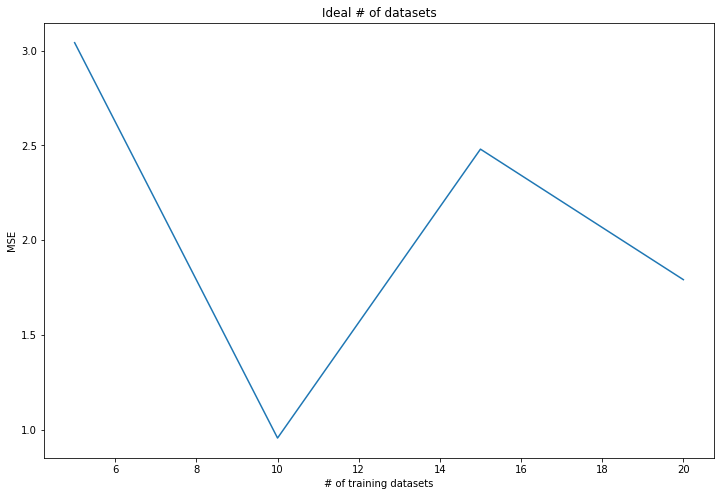

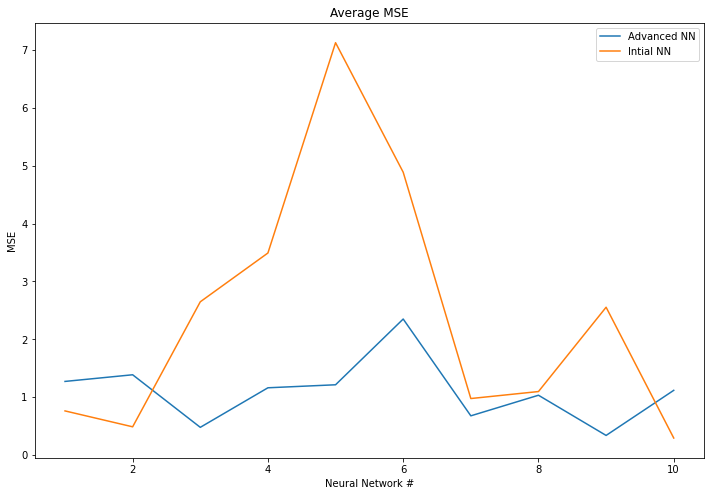

In [63]:
fig, ax = plt.subplots(figsize=(12,8))
    
X = np.array([5, 10, 15, 20])

plot_y = np.array([3.042, .955, 2.48, 1.791])

ax.plot(X, plot_y)
ax.set_title("Ideal # of datasets")
plt.ylabel("MSE")
plt.xlabel("# of training datasets")




fig, ax = plt.subplots(figsize=(12,8))
    
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
X2 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

plot_y = np.array([1.271, 1.386, .477, 1.161, 1.213, 2.350, .676, 1.032, .337, 1.117])
plot_y2 = np.array([.761, .486, 2.648, 3.492, 7.129, 4.889, .975, 1.096, 2.554, .292])

ax.plot(X, plot_y, label="Advanced NN")
ax.plot(X2, plot_y2, label="Intial NN")

plt.legend(loc="upper right")

ax.set_title("Average MSE")
plt.ylabel("MSE")
plt.xlabel("Neural Network #")